<a href="https://colab.research.google.com/github/gamashbr/Desafio-DIO-Explorando-IA-Generativa-em-um-Pipeline-de-ETL-com-Python/blob/main/Project_Pipeline_ETL_Analisando_Dados_de_Venda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Contruindo um Pipeline ETL com Python - Analisando Dados de Venda**


O projeto modelo tem o título **Explorando IA Generativa em um Pipeline de ETL com Python.**

Inspirado pelo projeto modelo o aluno deveria replicar ou reimaginar uma pipeline ETL utilizando Python.

## Projeto
Imaginando um supermercado meu desafio é criar um pipeline ETL para extrair dados de vendas de um arquivo CSV, realizar algumas transformações simples como cálculo de total de vendas por produto e por período e por fim realizar carregamento dos dados transformados em um novo arquivo CSV além de criar uma visualização em tela para mostrar o resultados por meio de gráficos.

# **E**xtract
Nesta etapa vamos extrair os dados de vendas do arquivo `dados-supermecado.csv`. Este arquivo traz informações referentes ao ano de 2023 considerando o período de janeiro a agosto. As colunas contidas no arquivo são as seguintes: `Produto`, `Data`, `Quantidade` e `Valor`.

In [6]:
# Importando a biblioteca necessária
import pandas as pd
import matplotlib.pyplot as plt

# Carregando o arquivo CSV com dados de vendas de supermercado
file_path = "dados-supermercado.csv"
df = pd.read_csv(file_path)

# Visualizando as primeiras linhas do DataFrame para verificar os dados
print(df.head())


           Produto        Data  Quantidade  Valor
0            Arroz  2023-03-01           5   15.0
1           Feijão  2023-04-02           2   80.0
2         Macarrão  2023-06-03           3   25.0
3  Óleo de Cozinha  2023-08-04           4   20.0
4           Açúcar  2023-08-05           1   10.0


# Transform
Agora vamos calcular o total de vendas por produto e por mês.

In [7]:
# Calculando o total de vendas por produto
total_sales_by_product = df.groupby('Produto')['Valor'].sum()

# Extraindo o mês da coluna 'Data'
df['Mes'] = pd.to_datetime(df['Data']).dt.month

# Calculando o total de vendas por mês
total_sales_by_month = df.groupby('Mes')['Valor'].sum()

# Visualizando os resultados das transformações
print("Total de Vendas por Produto:")
print(total_sales_by_product)

print("\nTotal de Vendas por Mês:")
print(total_sales_by_month)


Total de Vendas por Produto:
Produto
Arroz               60.0
Açúcar              40.0
Feijão             500.0
Leite               48.0
Macarrão           100.0
Molho de Tomate     60.0
Sal                 20.0
Óleo de Cozinha     80.0
Name: Valor, dtype: float64

Total de Vendas por Mês:
Mes
1    170.0
2    190.0
3     90.0
4    192.0
5     10.0
6     35.0
7     37.0
8    184.0
Name: Valor, dtype: float64


# **L**oad
 Salvando os dados transformados em um novo arquivo CSV ou visualiando em tela.

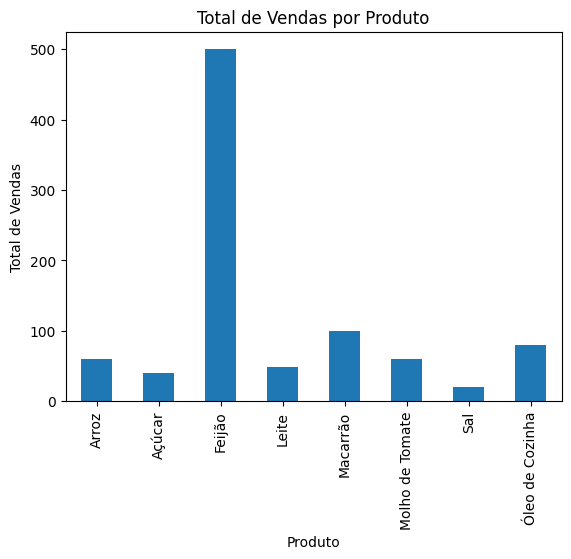

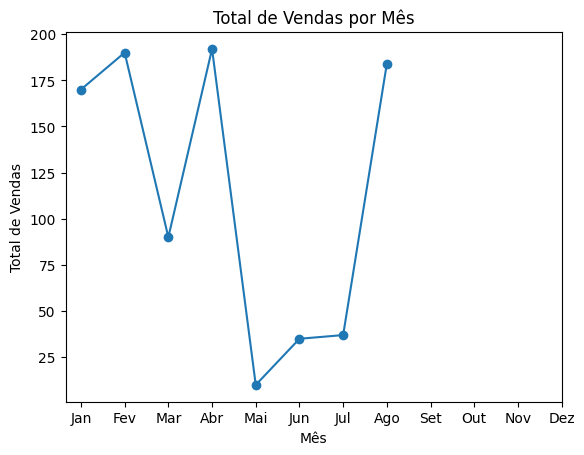

In [9]:
# Salvando os dados transformados em um arquivo CSV
total_sales_by_product.to_csv("total_vendas_por_produto.csv")
total_sales_by_month.to_csv("total_vendas_por_mes.csv")

# Alternativamente, criar uma visualização simples usando Matplotlib
import matplotlib.pyplot as plt

# Criando gráfico de barras para total de vendas por produto
total_sales_by_product.plot(kind='bar')
plt.xlabel('Produto')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Produto')
plt.show()

# Criando gráfico de linha para total de vendas por mês
total_sales_by_month.plot(kind='line', marker='o')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Mês')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()
